In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv(r"../zasoby/housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 
X = data.drop('MEDV', axis=1)
y = data['MEDV'].values

In [3]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2)

In [12]:
lasso_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [13]:
lasso_df.head()

,param_value,r2_result,number_of_features
0,0.1,NaN,NaN
1,0.2,NaN,NaN
2,0.3,NaN,NaN
3,0.4,NaN,NaN
4,0.5,NaN,NaN


In [14]:
for i in lasso_df.values:
    alpha = i[0]
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    i[1] = r2_score(y_test, lasso.predict(X_test))
    i[2] = len(lasso.coef_[lasso.coef_ > 0])

In [16]:
lasso_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
0,0.1,0.760254,5.0
1,0.2,0.751036,5.0
2,0.3,0.743425,4.0
3,0.4,0.733597,4.0
4,0.5,0.721477,3.0
...,...,...,...
73,7.4,-0.000486,0.0
72,7.3,-0.000486,0.0
71,7.2,-0.000486,0.0
70,7.1,-0.000486,0.0


In [17]:
ridge_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [18]:
for i in ridge_df.values:
    alpha = i[0]
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    i[1] = r2_score(y_test, ridge.predict(X_test))
    i[2] = len(ridge.coef_[ridge.coef_ > 0])

In [19]:
ridge_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
0,0.1,0.764174,6.0
1,0.2,0.764155,6.0
2,0.3,0.764134,6.0
3,0.4,0.764114,6.0
4,0.5,0.764093,6.0
...,...,...,...
95,9.6,0.761168,5.0
96,9.7,0.761132,5.0
97,9.8,0.761095,5.0
98,9.9,0.761058,5.0


In [20]:
en_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [21]:
for i in en_df.values:
    alpha = i[0]
    en = ElasticNet(alpha=alpha)
    en.fit(X_train, y_train)
    i[1] = r2_score(y_test, en.predict(X_test))
    i[2] = len(en.coef_[en.coef_ > 0])

In [22]:
en_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
0,0.1,0.755008,5.0
1,0.2,0.744244,5.0
2,0.3,0.733381,5.0
3,0.4,0.722847,4.0
4,0.5,0.712679,4.0
...,...,...,...
95,9.6,0.081529,1.0
96,9.7,0.078688,1.0
97,9.8,0.075883,1.0
98,9.9,0.073115,1.0


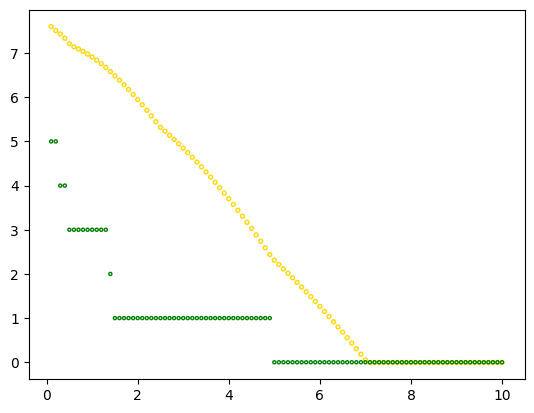

In [36]:
plt.scatter(lasso_df.param_value, lasso_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(lasso_df.param_value, lasso_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()

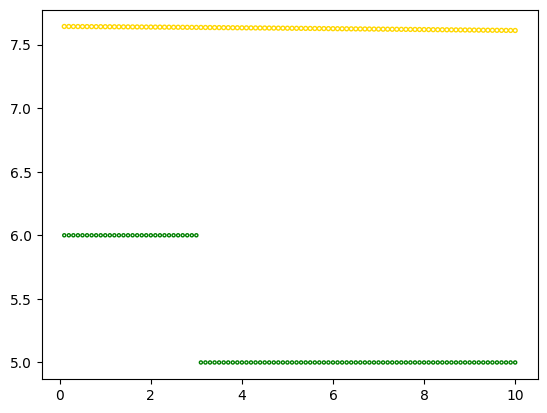

In [37]:
plt.scatter(ridge_df.param_value, ridge_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(ridge_df.param_value, ridge_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()

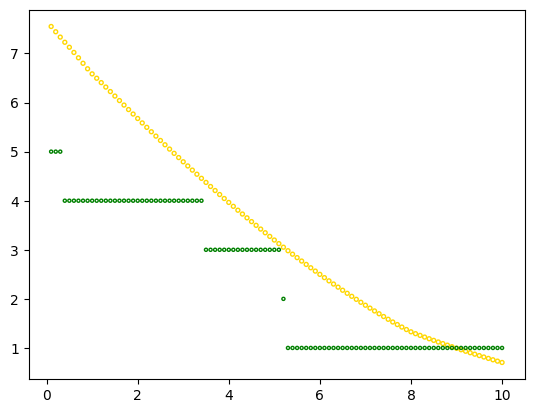

In [38]:
plt.scatter(en_df.param_value, en_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(en_df.param_value, en_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
lasso_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [41]:
for i in lasso_df.values:
    alpha = i[0]
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    i[1] = r2_score(y_test, lasso.predict(X_test))
    i[2] = len(lasso.coef_[lasso.coef_ > 0])

In [42]:
lasso_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
0,0.1,0.691516,5.0
1,0.2,0.686070,4.0
2,0.3,0.682966,4.0
3,0.4,0.679324,4.0
4,0.5,0.675156,5.0
...,...,...,...
95,9.6,0.493855,2.0
96,9.7,0.493206,2.0
97,9.8,0.492550,2.0
98,9.9,0.491888,2.0


In [43]:
ridge_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [44]:
for i in ridge_df.values:
    alpha = i[0]
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    i[1] = r2_score(y_test, ridge.predict(X_test))
    i[2] = len(ridge.coef_[ridge.coef_ > 0])

In [45]:
ridge_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
2,0.3,0.706163,6.0
3,0.4,0.706132,6.0
1,0.2,0.706122,6.0
4,0.5,0.706053,6.0
0,0.1,0.705976,7.0
...,...,...,...
95,9.6,0.697811,5.0
96,9.7,0.697763,5.0
97,9.8,0.697716,5.0
98,9.9,0.697669,5.0


In [46]:
en_df = pd.DataFrame({'param_value': np.arange(0.1, 10.1, 0.1), 'r2_result': np.NaN, 'number_of_features': np.NaN})

In [47]:
for i in en_df.values:
    alpha = i[0]
    en = ElasticNet(alpha=alpha)
    en.fit(X_train, y_train)
    i[1] = r2_score(y_test, en.predict(X_test))
    i[2] = len(en.coef_[en.coef_ > 0])

In [48]:
en_df.sort_values(by='r2_result', ascending=False)

,param_value,r2_result,number_of_features
0,0.1,0.690076,5.0
1,0.2,0.682695,5.0
2,0.3,0.676511,6.0
3,0.4,0.671770,5.0
4,0.5,0.667381,5.0
...,...,...,...
95,9.6,0.512364,3.0
96,9.7,0.511711,3.0
97,9.8,0.511055,3.0
98,9.9,0.510389,3.0


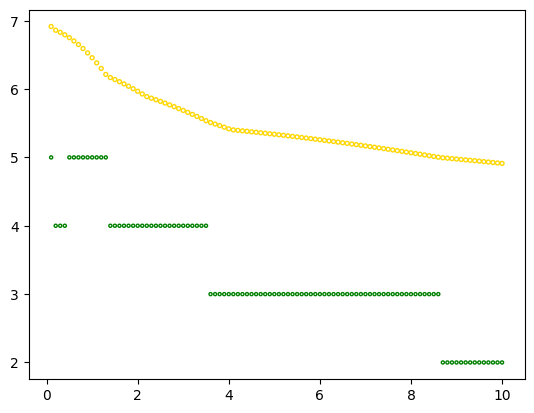

In [49]:
plt.scatter(lasso_df.param_value, lasso_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(lasso_df.param_value, lasso_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()

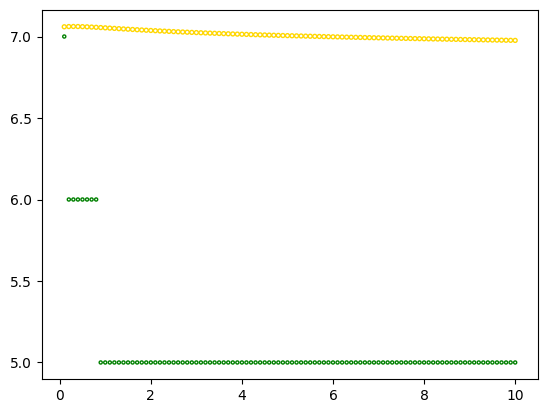

In [50]:
plt.scatter(ridge_df.param_value, ridge_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(ridge_df.param_value, ridge_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()

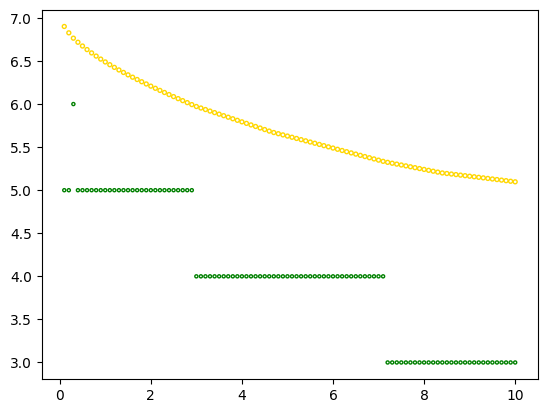

In [51]:
plt.scatter(en_df.param_value, en_df.r2_result*10, edgecolor='gold', facecolor='none', s=8)
plt.scatter(en_df.param_value, en_df.number_of_features, facecolor='none', edgecolor='green', s=5)
plt.show()